In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf

import tensorflow.contrib.slim as slim

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('../datasets/')

In [5]:
import orientset

In [6]:
oriset = orientset.get_split('', '../data/tfrecord/')

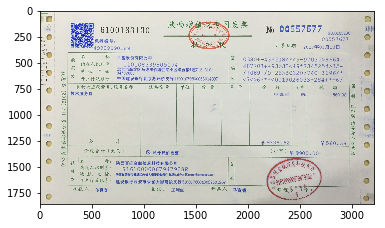

In [7]:
with tf.Graph().as_default():
    data_provider = slim.dataset_data_provider.DatasetDataProvider(oriset)

    image, label = data_provider.get(['image', 'label'])
    
    # view the image
    with tf.Session() as sess:
        with slim.queues.QueueRunners(sess):
            for i in range(1):
                np_image, np_label = sess.run([image, label])
                plt.figure()
                plt.imshow(np_image)

# preprocessing

In [8]:
sys.path.append('../nets/')
sys.path.append('../preprocessing/')

In [9]:
import vgg_preprocessing, vgg

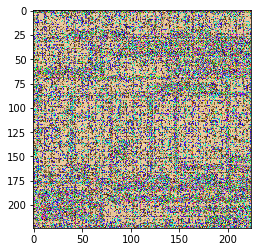

In [15]:
data_provider = slim.dataset_data_provider.DatasetDataProvider(oriset)
image, label = data_provider.get(['image', 'label'])
VGG_IMAGE_SIZE = vgg.vgg_16.default_image_size
image = vgg_preprocessing.preprocess_for_train(image, VGG_IMAGE_SIZE, VGG_IMAGE_SIZE)

# view the output of preprocessing
with tf.Session() as sess:
    with slim.queues.QueueRunners(sess):
        for i in range(1):
            np_image, np_label = sess.run([image, label])
            plt.figure()
            plt.imshow(np_image)

# make batches

In [19]:
batch_image, batch_label = tf.train.batch([image, label], batch_size=32)
batch_one_hot_label = slim.one_hot_encoding(batch_label, oriset.num_classes)